In [1]:
"""
Purpose: To Run the proofreading of neurons in the 
test set and measure the precision and recall of the new rules



"""

'\nPurpose: To Run the proofreading of neurons in the \ntest set and measure the precision and recall of the new rules\n\n\n\n'

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/")
sys.path.append("/meshAfterParty/meshAfterParty")

import datajoint_utils as du
from importlib import reload

INFO - 2021-04-24 10:16:46,190 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-24 10:16:46,193 - settings - Setting database.user to celiib
INFO - 2021-04-24 10:16:46,194 - settings - Setting database.password to newceliipass
INFO - 2021-04-24 10:16:46,196 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-04-24 10:16:46,197 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-24 10:16:46,209 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-04-24 10:16:46,643 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-24 10:16:46,648 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-24 10:16:46,649 - settings - Setting database.user to celiib
INFO - 2021-04-24 10:16:46,650 - settings - Setting database.password to newceliipass
INFO - 2021-04-24 10:16:46,651 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-24 10:16:46,652 - settings - Setting database.user to celiib
INFO - 2021-04-24 10:16:46,653 - settings - Setting database.password to newceliipass
INFO - 2021-04-24 10:16:46,654 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-24 10:16:47,227 - settings - Setting enable_python_native_blobs to True


In [4]:
#configuring will include the adapters
minnie,schema = du.configure_minnie_vm()

INFO - 2021-04-24 10:16:47,374 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-24 10:16:47,376 - settings - Setting database.user to celiib
INFO - 2021-04-24 10:16:47,377 - settings - Setting database.password to newceliipass
INFO - 2021-04-24 10:16:47,381 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-24 10:16:47,919 - settings - Setting enable_python_native_blobs to True


In [5]:
import validation_utils as vu
import neuron_visualizations as nviz
import neuron_utils as nru
import proofreading_utils as pru
import time
import system_utils as su

# Runnig the validation

In [6]:
"""
Psueodocode: 
1) Pull down the segment ids of the valid neurons

For each neuron
1) Dwonload the neuron object
2) Run the Proofreading
3) Print out the validation plot
4) Save the validation df

"""

'\nPsueodocode: \n1) Pull down the segment ids of the valid neurons\n\nFor each neuron\n1) Dwonload the neuron object\n2) Run the Proofreading\n3) Print out the validation plot\n4) Save the validation df\n\n'

In [7]:
segment_ids = minnie.AutoProofreadValidationBorderNeurons().fetch("segment_id")

In [8]:
job_idx = 6
job_step = 5
segments_to_process = segment_ids[job_idx*job_step:(job_idx+1)*job_step]
segments_to_process

array([864691135740225387, 864691135272164113, 864691136618403213,
       864691135974454383, 864691136134446219])


--- Working on Neuron 864691135740225387 --
Decompressing Neuron in minimal output mode...please wait


 ----- Working on coordinate [537544.12308935 748196.07600502 851154.4169303 ]--------
coordinate [537544.12308935 748196.07600502 851154.4169303 ] had error branches []--------


 ----- Working on coordinate [550317.63660057 724752.25523179 850949.91251663]--------
coordinate [550317.63660057 724752.25523179 850949.91251663] had error branches [2, 3]--------


 ----- Working on coordinate [556948.74046905 751355.77893429 861505.53793033]--------
coordinate [556948.74046905 751355.77893429 861505.53793033] had error branches [2, 3, 20, 21, 22]--------


 ----- Working on coordinate [581415.81144569 759370.80331995 882057.43412752]--------
coordinate [581415.81144569 759370.80331995 882057.43412752] had error branches [2, 3, 20, 21, 22, 26, 7]--------


 ----- Working on coordinate [584444.62135697 766673.04164304 878941.15323038]--------
coordinate [584444.62135697 766673.04164304 8

coordinate [835455.32035213 674601.08442232 667127.35269151] had error branches [2, 3, 20, 21, 22, 26, 7, 38, 35, 40, 41, 44, 27, 53, 54, 61, 63, 64, 68, 71, 75, 76, 85, 86, 101, 110, 118, 123, 113, 141, 137, 148, 149, 150, 147, 152, 181, 175, 183, 189, 193, 195, 213, 219, 215, 217, 216, 224, 225, 227, 230, 232, 239, 221, 226, 238, 258, 260, 266, 271, 284, 287, 288]--------


 ----- Working on coordinate [836557.64108158 674833.76842308 663808.41103479]--------
coordinate [836557.64108158 674833.76842308 663808.41103479] had error branches [2, 3, 20, 21, 22, 26, 7, 38, 35, 40, 41, 44, 27, 53, 54, 61, 63, 64, 68, 71, 75, 76, 85, 86, 101, 110, 118, 123, 113, 141, 137, 148, 149, 150, 147, 152, 181, 175, 183, 189, 193, 195, 213, 219, 215, 217, 216, 224, 225, 227, 230, 232, 239, 221, 226, 238, 258, 260, 266, 271, 284, 287, 288, 291, 281]--------


 ----- Working on coordinate [836684.07757234 705334.60610603 741921.61493037]--------
coordinate [836684.07757234 705334.60610603 741921.6149303

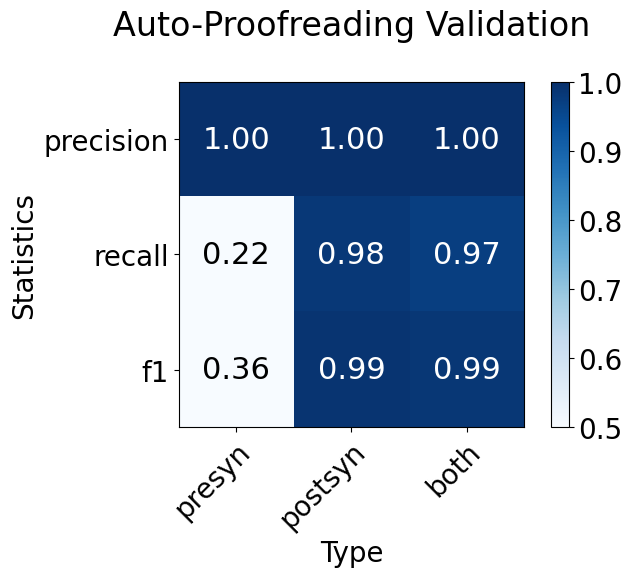

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/validation_data/864691135740225387_validation_df.pbz2
File size is 0.051173 MB
Total time for neuron 864691135740225387: 226.03054666519165

--- Working on Neuron 864691135272164113 --
Decompressing Neuron in minimal output mode...please wait


 ----- Working on coordinate [1112070.94034511  687866.66492916 1007934.61828425]--------
coordinate [1112070.94034511  687866.66492916 1007934.61828425] had error branches []--------


 ----- Working on coordinate [1138829.48235962  762579.58028237 1080261.35048637]--------
coordinate [1138829.48235962  762579.58028237 1080261.35048637] had error branches []--------


 ----- Working on coordinate [1154644.   762275.5 1074263. ]--------
coordinate [1154644.   762275.5 1074263. ] had error branches [81, 82, 86]--------


 ----- Working on coordinate [1172003.13960567  759834.62548635 1064484.0424417 ]--------
coordinate [1172003.13960567  759834.62548635 1064484.0424417 ] 

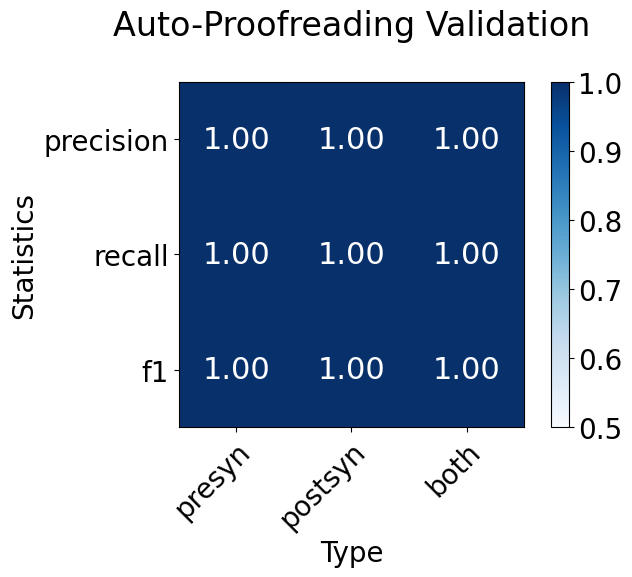

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/validation_data/864691135272164113_validation_df.pbz2
File size is 0.115536 MB
Total time for neuron 864691135272164113: 230.63287353515625

--- Working on Neuron 864691136618403213 --
Decompressing Neuron in minimal output mode...please wait


 ----- Working on coordinate [1125333.47568904  770283.01546975  941101.64914749]--------
coordinate [1125333.47568904  770283.01546975  941101.64914749] had error branches []--------


 ----- Working on coordinate [1151355.90408341  826561.07964953 1026299.89868937]--------
coordinate [1151355.90408341  826561.07964953 1026299.89868937] had error branches [3, 5]--------


 ----- Working on coordinate [1173463.86110299  826063.57389872 1037349.04932548]--------
coordinate [1173463.86110299  826063.57389872 1037349.04932548] had error branches [3, 5, 22, 23, 21]--------


 ----- Working on coordinate [1177930.76945725  824038.92261854 1041163.6325108 ]--------
coordinate [

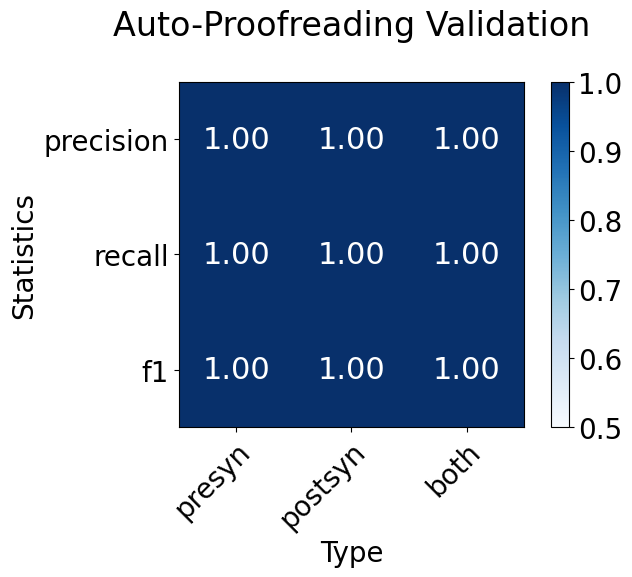

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/validation_data/864691136618403213_validation_df.pbz2
File size is 0.064719 MB
Total time for neuron 864691136618403213: 136.26537942886353

--- Working on Neuron 864691135974454383 --
Decompressing Neuron in minimal output mode...please wait


 ----- Working on coordinate [1126572.87699544  699073.01918174 1054412.97573984]--------
coordinate [1126572.87699544  699073.01918174 1054412.97573984] had error branches []--------


 ----- Working on coordinate [1146270.69919383  918285.42265269 1086061.27120456]--------
coordinate [1146270.69919383  918285.42265269 1086061.27120456] had error branches [8, 9]--------


 ----- Working on coordinate [1150781.88806206  674368.65250079 1113626.42267623]--------
coordinate [1150781.88806206  674368.65250079 1113626.42267623] had error branches [8, 9, 14, 11]--------


 ----- Working on coordinate [1154039.60136973  677297.80755696 1111696.14586088]--------
coordinate [1154

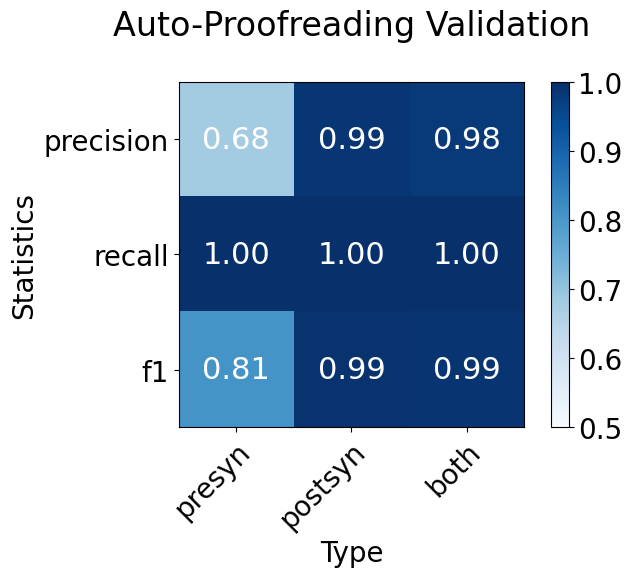

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/validation_data/864691135974454383_validation_df.pbz2
File size is 0.08812 MB
Total time for neuron 864691135974454383: 204.28009939193726

--- Working on Neuron 864691136134446219 --
Decompressing Neuron in minimal output mode...please wait


 ----- Working on coordinate [981194.03744475 981266.57504955 883360.48293495]--------
coordinate [981194.03744475 981266.57504955 883360.48293495] had error branches []--------


 ----- Working on coordinate [1001679.  980112.  857136.]--------
coordinate [1001679.  980112.  857136.] had error branches [6, 0]--------


 ----- Working on coordinate [1002947.50092087  978950.6278521   854251.3307155 ]--------
coordinate [1002947.50092087  978950.6278521   854251.3307155 ] had error branches [6, 0, 19, 16]--------


 ----- Working on coordinate [1005926.25576366  980427.04448604  855429.06579702]--------
coordinate [1005926.25576366  980427.04448604  855429.06579702] had err

coordinate [1255044.78203527  947551.98949985  710768.56171198] had error branches [6, 0, 19, 16, 21, 10, 17, 24, 1, 27, 29, 31, 32, 37, 38, 43, 40, 54, 56, 53, 59, 50, 44, 48, 51, 57, 58, 61, 63, 65, 66, 34, 47, 62, 68, 69, 70, 71, 72, 73, 77, 78, 49, 80, 98, 99, 90, 97, 88, 83, 107, 103, 106, 124, 100, 121, 125, 127, 129, 114, 130, 134, 108, 126, 61, 112, 115, 117, 118, 128, 136, 137, 142, 143, 133, 139, 146, 145, 149, 154, 158]--------


 ----- Working on coordinate [1256760.40445185  943787.64253443  698939.74171418]--------
coordinate [1256760.40445185  943787.64253443  698939.74171418] had error branches [6, 0, 19, 16, 21, 10, 17, 24, 1, 27, 29, 31, 32, 37, 38, 43, 40, 54, 56, 53, 59, 50, 44, 48, 51, 57, 58, 61, 63, 65, 66, 34, 47, 62, 68, 69, 70, 71, 72, 73, 77, 78, 49, 80, 98, 99, 90, 97, 88, 83, 107, 103, 106, 124, 100, 121, 125, 127, 129, 114, 130, 134, 108, 126, 61, 112, 115, 117, 118, 128, 136, 137, 142, 143, 133, 139, 146, 145, 149, 154, 158, 144, 191]--------


 ----- Wor

coordinate [1298225.33475126 1042065.58392728  850471.85358196] had error branches [6, 0, 19, 16, 21, 10, 17, 24, 1, 27, 29, 31, 32, 37, 38, 43, 40, 54, 56, 53, 59, 50, 44, 48, 51, 57, 58, 61, 63, 65, 66, 34, 47, 62, 68, 69, 70, 71, 72, 73, 77, 78, 49, 80, 98, 99, 90, 97, 88, 83, 107, 103, 106, 124, 100, 121, 125, 127, 129, 114, 130, 134, 108, 126, 61, 112, 115, 117, 118, 128, 136, 137, 142, 143, 133, 139, 146, 145, 149, 154, 158, 144, 191, 171, 188, 218, 222, 225, 226, 200, 253, 255, 258, 262, 288, 272, 377, 380, 373]--------


 ----- Working on coordinate [1302326.69008215 1041547.05084816  850776.18692269]--------
coordinate [1302326.69008215 1041547.05084816  850776.18692269] had error branches [6, 0, 19, 16, 21, 10, 17, 24, 1, 27, 29, 31, 32, 37, 38, 43, 40, 54, 56, 53, 59, 50, 44, 48, 51, 57, 58, 61, 63, 65, 66, 34, 47, 62, 68, 69, 70, 71, 72, 73, 77, 78, 49, 80, 98, 99, 90, 97, 88, 83, 107, 103, 106, 124, 100, 121, 125, 127, 129, 114, 130, 134, 108, 126, 61, 112, 115, 117, 118, 

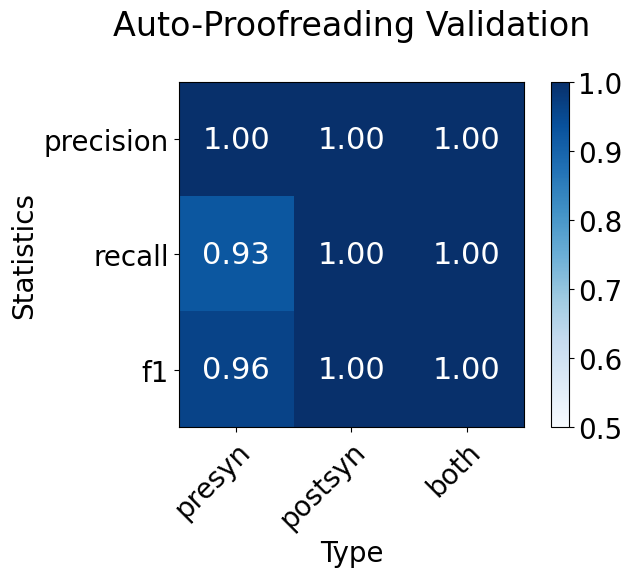

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/validation_data/864691136134446219_validation_df.pbz2
File size is 0.165508 MB
Total time for neuron 864691136134446219: 520.4861850738525


In [9]:
for seg_id in segments_to_process:
    print(f"\n--- Working on Neuron {seg_id} --")
    st = time.time()
    
    
    #1) Dwonload the neuron object
    neuron_obj = du.fetch_neuron_obj_manual(seg_id,
                                       border_validation=True)
    
    (filt_neuron,
     return_synapse_df_revised,
    return_validation_df_revised) =  vu.filtered_neuron_score(neuron_obj = neuron_obj,   
                        filter_list = pru.v4_exc_filters(),
                        plot_limb_branch_filter_with_disconnect_effect = False,
                        verbose = False,
                        plot_score=False)
    
    vu.synapse_validation_df_to_score_plot(return_validation_df_revised)
    
    su.compressed_pickle(return_validation_df_revised,f"./validation_data/{seg_id}_validation_df")
    
    print(f"Total time for neuron {seg_id}: {time.time() - st}")